In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Importar bibliotecas
import os
import pandas as pd
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from tensorflow.keras.utils import plot_model  # Para visualizar el modelo

In [42]:
# Paso 1: Cargar los datos normalizados
data_path = "/content/drive/MyDrive/DATATON/NORMAL/preprocessed_CAMPECHE.csv"
data = pd.read_csv(data_path)

# Normalización de los datos
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))

In [43]:
# Paso 2: Definir y entrenar el modelo de Autoencoder
input_dim = normalized_data.shape[1]  # Dimensión de entrada (número de características)
encoding_dim = 3  # Dimensión de codificación (mayor que 1 para que PCA funcione)

autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),  # Aumentamos la dimensión de codificación
    Dense(input_dim, activation='sigmoid')  # Capa de decodificación
])

autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(normalized_data, normalized_data, epochs=50, batch_size=32, shuffle=True, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1924  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1920 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1917 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1901 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1895 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1898 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1848 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1805 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1860 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1812 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1789 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1803 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1732 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1763 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1748 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━

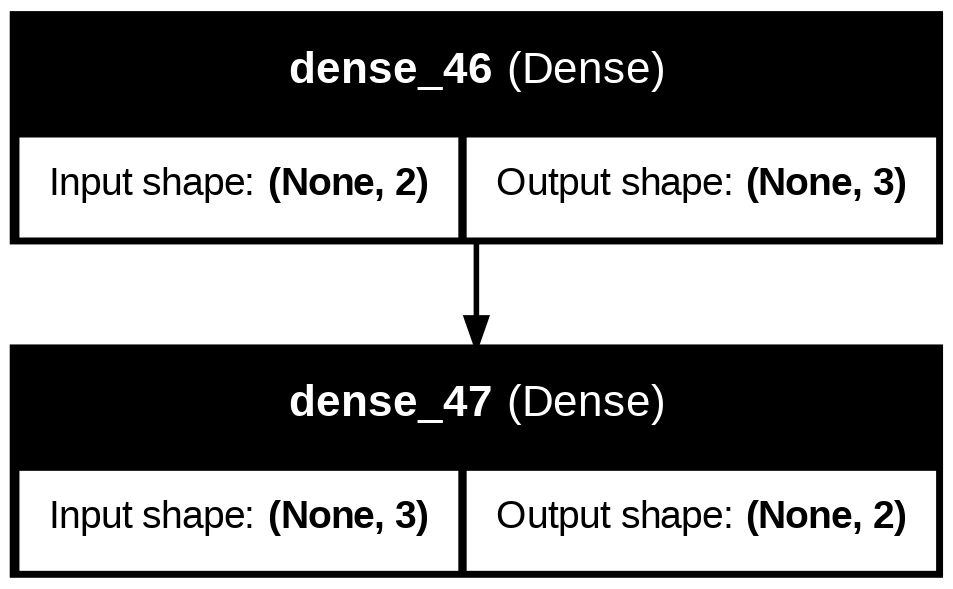

In [44]:
# Visualizar la arquitectura del autoencoder en el mismo notebook
plot_model(autoencoder, show_shapes=True, show_layer_names=True, to_file='/content/autoencoder_architecture.png')

# Mostrar el modelo en el notebook (la imagen será generada automáticamente)
from IPython.display import Image
Image(filename='/content/autoencoder_architecture.png')

In [45]:
# Paso 3: Extraer las representaciones codificadas (output del autoencoder)
encoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='relu')
])
encoder.set_weights(autoencoder.get_weights()[:2])  # Transferir los pesos entrenados

encoded_data = encoder.predict(normalized_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [46]:
# Paso 4: Aplicar KMeans a las representaciones codificadas
n_clusters = 5  # Número de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(encoded_data)

# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Guardar el archivo con los clusters
output_path = "/content/drive/MyDrive/DATATON/PDN_SC66/preprocessed_autoencoder_clusters.csv"
data.to_csv(output_path, index=False)

print(f"El archivo con los clusters ha sido guardado en: {output_path}")

El archivo con los clusters ha sido guardado en: /content/drive/MyDrive/DATATON/PDN_SC66/preprocessed_autoencoder_clusters.csv


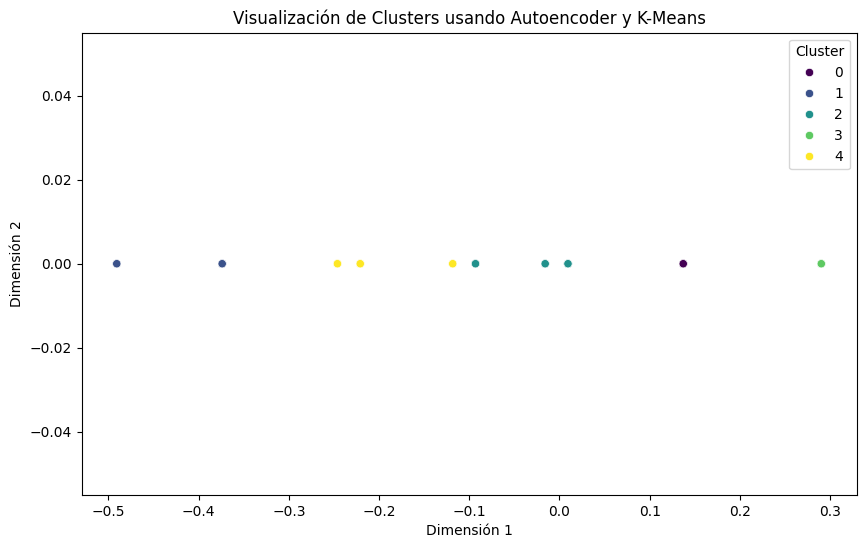

In [47]:
# Paso 5: Visualización de los clusters usando PCA
# Reducir las dimensiones a 2 para visualizar los clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)

# Crear un DataFrame con las nuevas dimensiones y los clusters
visualization_data = pd.DataFrame(reduced_data, columns=['Dim1', 'Dim2'])
visualization_data['Cluster'] = kmeans.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dim1', y='Dim2',
    hue='Cluster',  # Colorea por los clusters
    palette='viridis',  # Paleta de colores
    data=visualization_data,
    legend='full'
)
plt.title('Visualización de Clusters usando Autoencoder y K-Means')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()
